# Geometry #4 
Visualize the influence of bedrock elevation

## Initialization

In [1]:
# Import pyKasso and other useful packages
import pykasso as pk
import numpy as np

In [2]:
# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0' : 0,
    'y0' : 0,
    'z0' : 0,
    'nx' : 100,
    'ny' : 100,
    'nz' : 50,
    'dx' : 10,
    'dy' : 10,
    'dz' : 10
}

# Create a new project and declare its parameters
app.new_project(project_name='geometry_04', grid_parameters=grid_parameters)
app.visualizer.notebook = True
nx, ny, nz = app.project.grid.shape

In [3]:
# Declare the model parameters
model_parameters = {
    'sks' : {
        'seed' : 4444,
    },
    'domain' : {},
    'outlets' : {
        'number'     : 1,
        'data'       : [[990, 500]],
        'importance' : [1],
        'mode'       : 'domain_bottom',
    },
    'inlets' : {
        'number'     : 1,
        'data'       : [[0, 500]],
        'per_outlet' : [1],
        'importance' : [1],
        'mode'       : 'domain_surface',
    },
}

## Bedrock elevation as an inclined plane

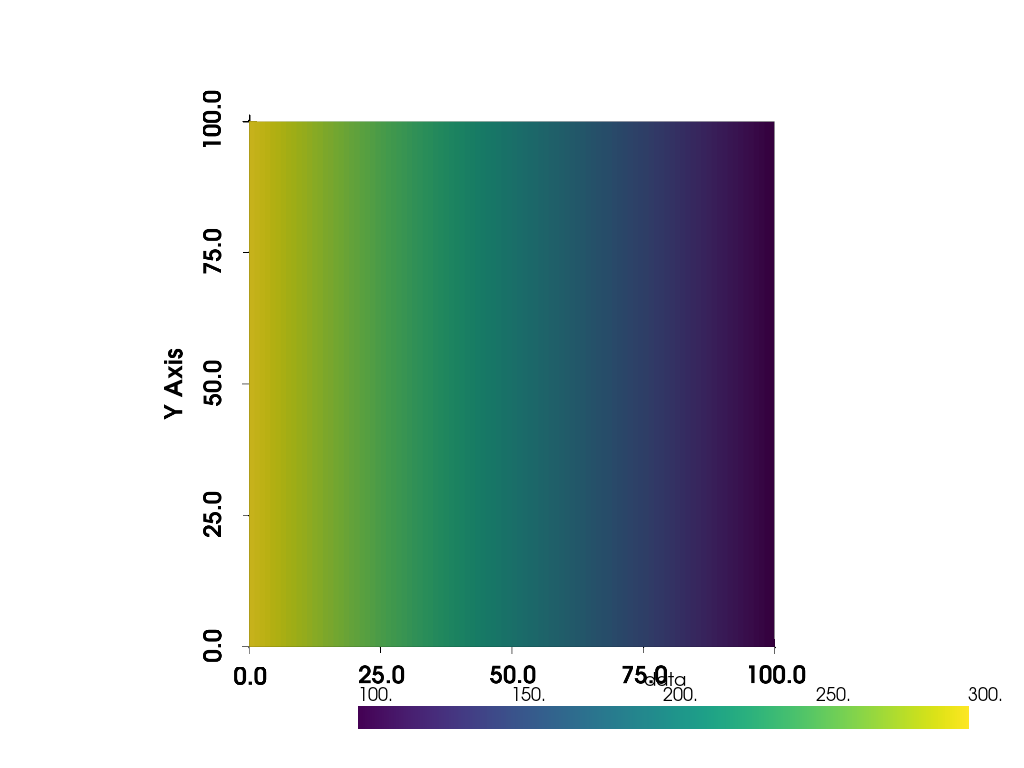

In [4]:
# Construct the bedrock
bedrock = np.linspace(300, 100, nx)
bedrock = np.repeat(bedrock[:, np.newaxis], ny, axis=1)

# Visualize the bedrock
app.visualizer.pv_plot_array(bedrock)

# Update the settings
model_parameters['domain']['bedrock'] = bedrock

In [5]:
# Compute karst conduit networks
for algorithm in ['Isotropic3', 'Riemann3']:
    model_parameters['sks']['algorithm'] = algorithm
    app.model.generate(model_parameters)

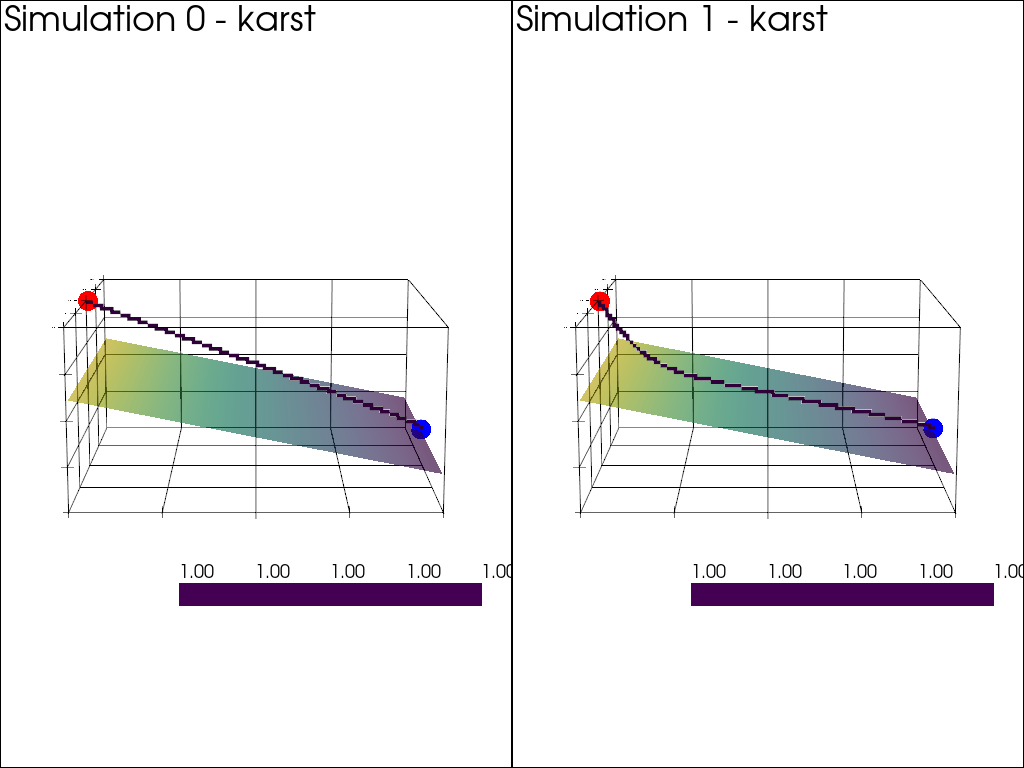

In [6]:
# Visualize the results
settings = {
    'ghost_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
    'surfaces_options' : {
        'bedrock' : {},
    },
}
last_simulations = app.project.get_last_simulations(2)
app.visualizer.pv_show(simulations=last_simulations,
                       features=['karst'],
                       settings=settings,
                       cpos=[0, -5, 1])

## Bedrock elevation as a v-shaped valley

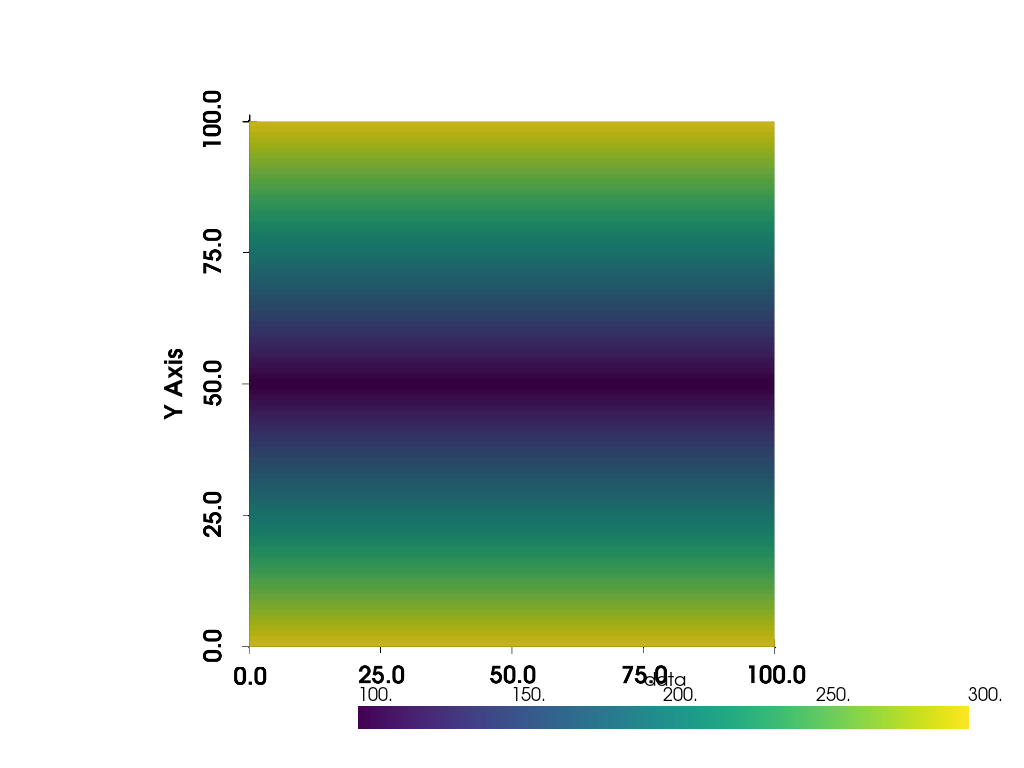

In [7]:
# Construct the new bedrock
bedrock = np.append(np.linspace(300, 100, 50), np.linspace(100, 300, 50)) 
bedrock = np.repeat(bedrock[np.newaxis, :], ny, axis=0)

# Visualize the bedrock
app.visualizer.pv_plot_array(bedrock)

# Update the parameters
model_parameters['domain']['bedrock'] = bedrock
model_parameters['inlets']['data'] = [[0, 0]]

In [8]:
# Compute new karst conduit networks
for algorithm in ['Isotropic3', 'Riemann3']:
    model_parameters['sks']['algorithm'] = algorithm
    app.model.generate(model_parameters)

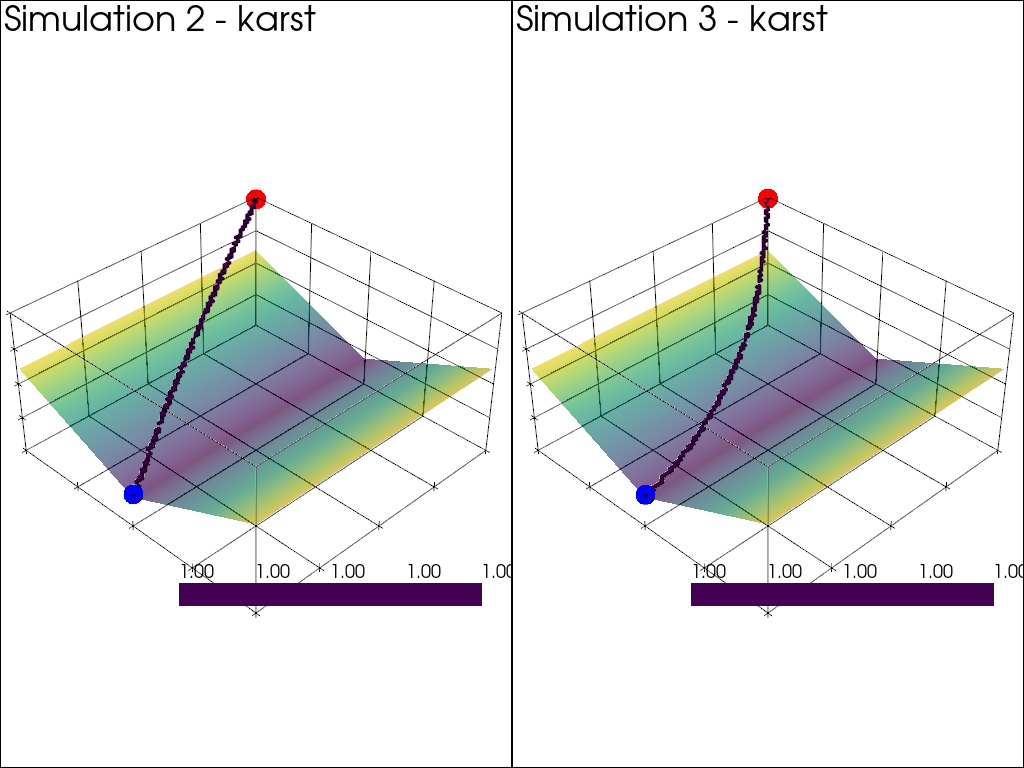

In [9]:
# Visualize the results
settings = {
    'ghost_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
    'surfaces_options' : {
        'bedrock' : {},
    },
}
last_simulations = app.project.get_last_simulations(2)
app.visualizer.pv_show(simulations=last_simulations,
                       features=['karst'],
                       settings=settings,
                       cpos=[1,1,1])

## Bedrock elevation as an inclined v-shaped valley

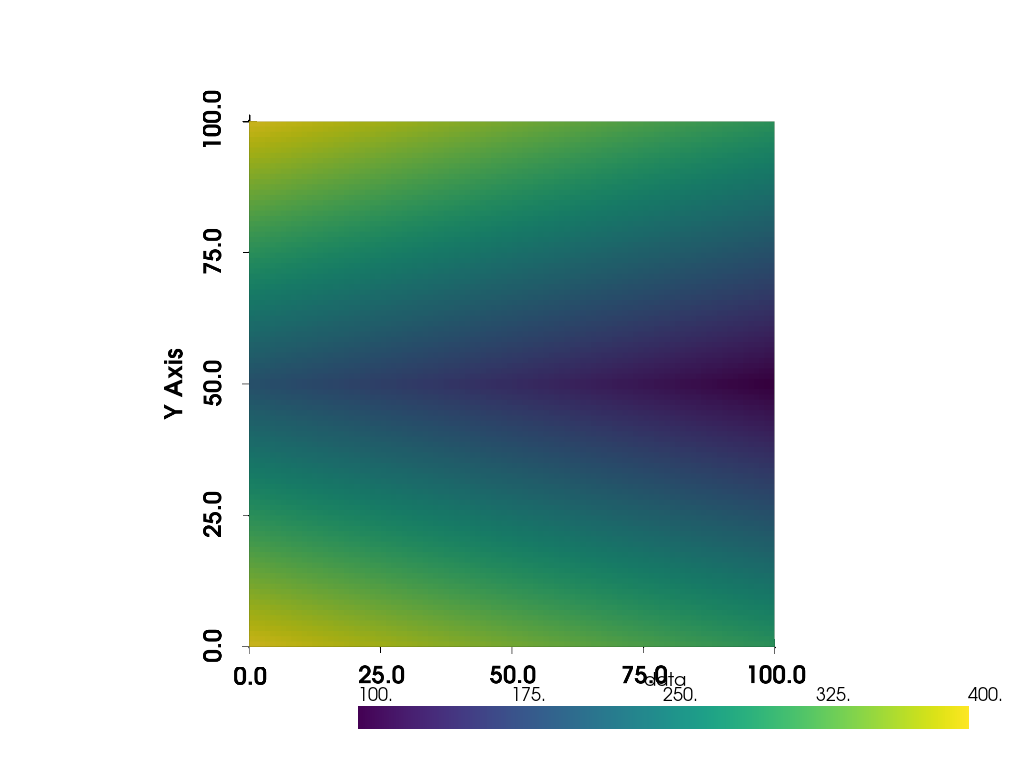

In [10]:
# Construct the new bedrock
z_valley = np.linspace(200, 100, 100)
bedrock = []
for z in z_valley:
    line = np.append(np.linspace(200+z, z, 50), np.linspace(z, 200+z, 50)) 
    bedrock.append(line)
bedrock = np.vstack(bedrock)

# Visualize the bedrock
app.visualizer.pv_plot_array(bedrock)

# Update the parameters
model_parameters['sks']['algorithm']  = 'Riemann3'
model_parameters['domain']['bedrock'] = bedrock
model_parameters['inlets']['data']    = [[0, 0]]

In [11]:
# Compute new karst conduit networks
model_parameters['sks']['algorithm'] = 'Isotropic3'
app.model.generate(model_parameters)

model_parameters['sks']['algorithm'] = 'Riemann3'
model_parameters['sks']['mode'] = 'D'
app.model.generate(model_parameters)

model_parameters['sks']['costs'] = {'ratio': 0.1}
app.model.generate(model_parameters)

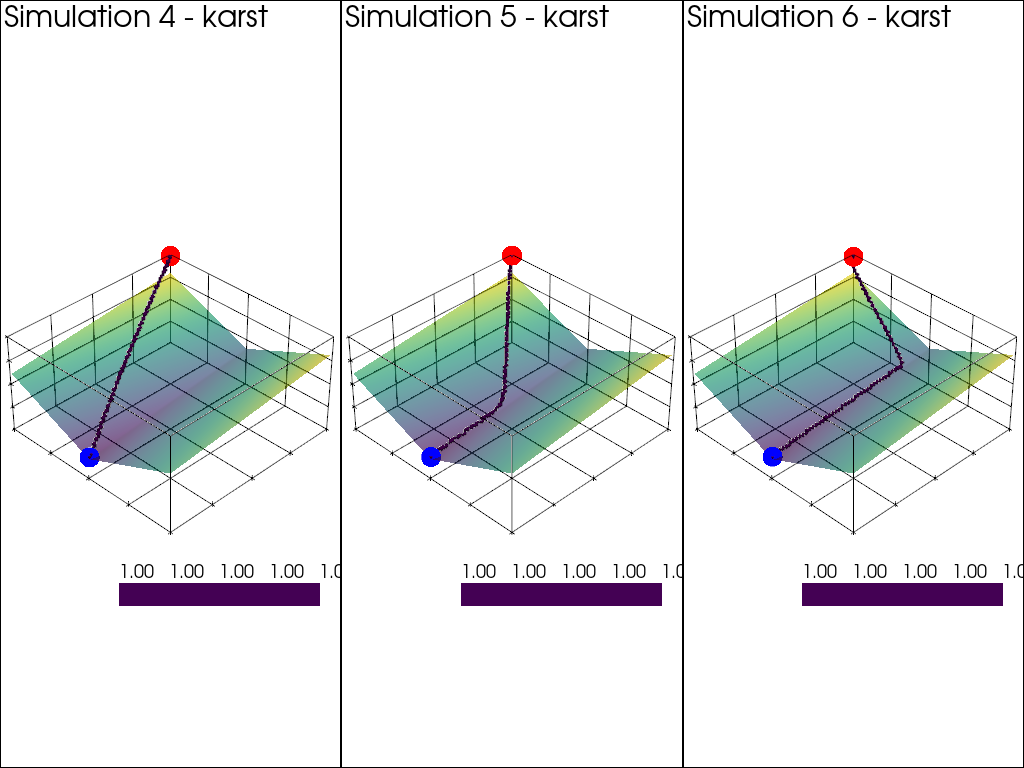

In [12]:
# Visualize the results
settings = {
    'ghost_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
    'surfaces_options' : {
        'bedrock' : {},
    },
}
last_simulations = app.project.get_last_simulations(3)
app.visualizer.pv_show(simulations=last_simulations,
                       features=['karst'],
                       settings=settings,
                       cpos=[1,1,1])